In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importing Dataset

In [8]:
import os
print(os.listdir("../Project/"))

['.ipynb_checkpoints', 'books.csv', 'Goodreads_dataset_project.ipynb', 'Project_Description_ML_DA_2022.pdf']


In [9]:
df = pd.read_csv('../Project/books.csv', error_bad_lines=False)
df.head()

C:\Users\faruk\AppData\Local\Temp\ipykernel_10176\1423973368.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('../Project/books.csv', error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [10]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [11]:
print(df.shape)

(11123, 12)


In [13]:
df.dtypes # Check the data types of all columns

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

# 2.Data Cleaning & Feature Engineering

In [15]:
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


There is a space in front of num_pages, so I renamed it.

In [16]:
df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True)

In [17]:
df.isnull().sum() # Check if there's any missing value

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [19]:
np.unique(df['language_code'])

array(['ale', 'ara', 'en-CA', 'en-GB', 'en-US', 'eng', 'enm', 'fre',
       'ger', 'gla', 'glg', 'grc', 'ita', 'jpn', 'lat', 'msa', 'mul',
       'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe', 'tur', 'wel',
       'zho'], dtype=object)

The codes that represent English are divided into three, renamed them with 'eng'.

In [20]:
df['language_code'].replace(['en-US', 'en-GB', 'en-CA'], 'eng', inplace=True)
np.unique(df['language_code'])

array(['ale', 'ara', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc',
       'ita', 'jpn', 'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus',
       'spa', 'srp', 'swe', 'tur', 'wel', 'zho'], dtype=object)

In [21]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce')
df[df['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books
11094,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire


 1. Convert data type of publication_date from object into date type
 2. The publication dates of two books were not displayed correctly, and I replaced them manually.
 3. https://www.goodreads.com/book/show/31373.In_Pursuit_of_the_Proper_Sinner
 4. https://www.gallimard.fr/Catalogue/GALLIMARD/Bibliotheque-des-Histoires/Montaillou-village-occitan-de-1294-a-1324#

In [23]:
df.loc[df.bookID == 31373, 'publication_date'] = '1999-08-01 00:00:00'
df.loc[df.bookID == 45531, 'publication_date'] = '1975-10-01 00:00:00'

In [24]:
df['publication_year'] = pd.DatetimeIndex(df['publication_date']).year # Extract the publication year into a new column.

In [25]:
np.unique(df['publisher'], return_counts=True)

(array(['10/18', '1st Book Library', '1st World Library', ...,
        '角川書店 (Kadokawa Shoten)', '講談社', '集英社'], dtype=object),
 array([ 2,  1,  1, ...,  2,  6, 12], dtype=int64))

In [27]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df[['language_code']])
df[['language_code_num']] = encoder.fit_transform(df[['language_code']]) # Apply ordinal encoding on language_code to convert it into numerical column

In [28]:
encoder.fit(df[['publisher']])
df['publisher_num'] = encoder.fit_transform(df[['publisher']])# Apply ordinal encoding on publisher to convert it into numerical column

In [29]:
encoder.fit(df[['authors']])
df['authors_num'] = encoder.fit_transform(df[['authors']])# Apply ordinal encoding on authors to convert it into numerical column

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  int64         
 6   language_code       11123 non-null  object        
 7   num_pages           11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11123 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
 12  publication_year    11123 non-null  int64         
 13  language_code_num   11123 non-null  float64   

In [31]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,language_code_num,publisher_num,authors_num
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,2.0,1778.0,2626.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,2.0,1778.0,2626.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2003,2.0,1773.0,2622.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004,2.0,1778.0,2626.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004,2.0,1773.0,2626.0


# 3.Exploartory Data Analysis

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

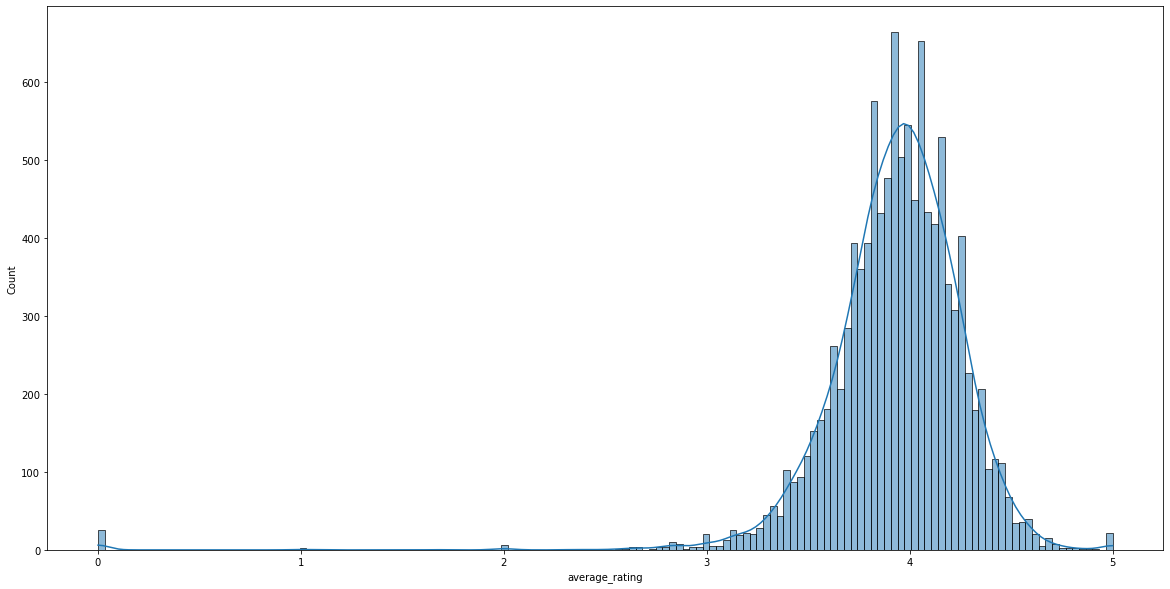

In [32]:
plt.figure(figsize = (20,10))
sns.histplot(data=df, x="average_rating", kde=True)

In this dataset, the average rating is around 4.

<AxesSubplot:xlabel='num_pages', ylabel='Count'>

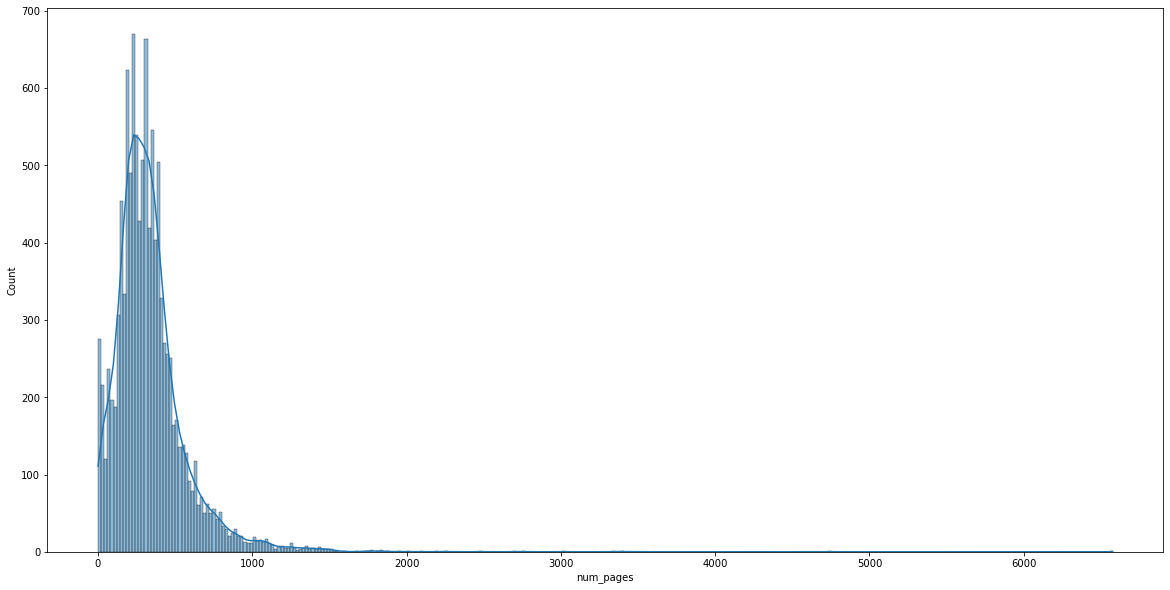

In [136]:
plt.figure(figsize = (20,10))
sns.histplot(data=df, x="num_pages", kde=True)

The vast majority of the books are 700 pages or less.

<AxesSubplot:xlabel='language_code', ylabel='Count'>

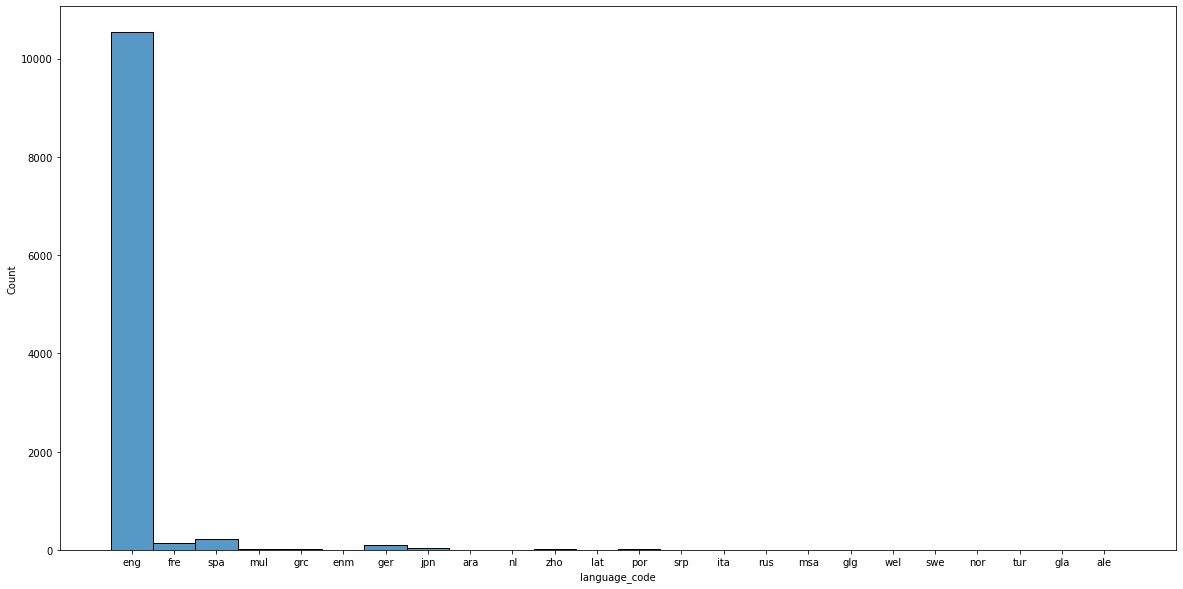

In [137]:
plt.figure(figsize = (20,10))
sns.histplot(data=df, x="language_code")

The number of English books is the highest.

D:\Anaconda\envs\grproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

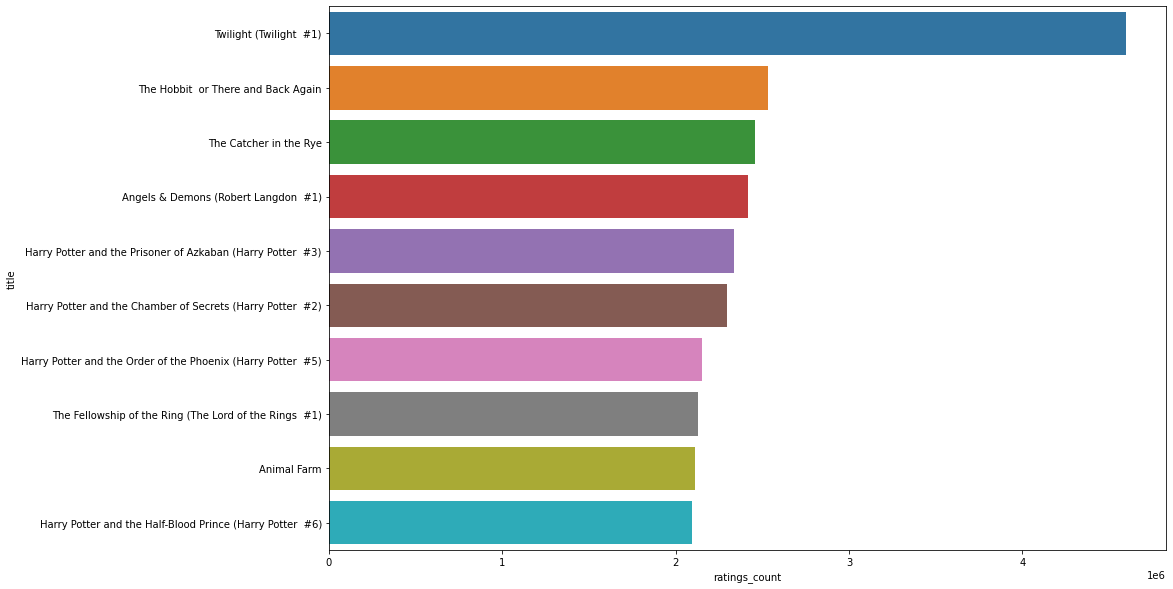

In [138]:
top_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize = (15,10))
sns.barplot(top_rated['ratings_count'], top_rated.index)

The top 10 books with the most number of ratings.

D:\Anaconda\envs\grproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

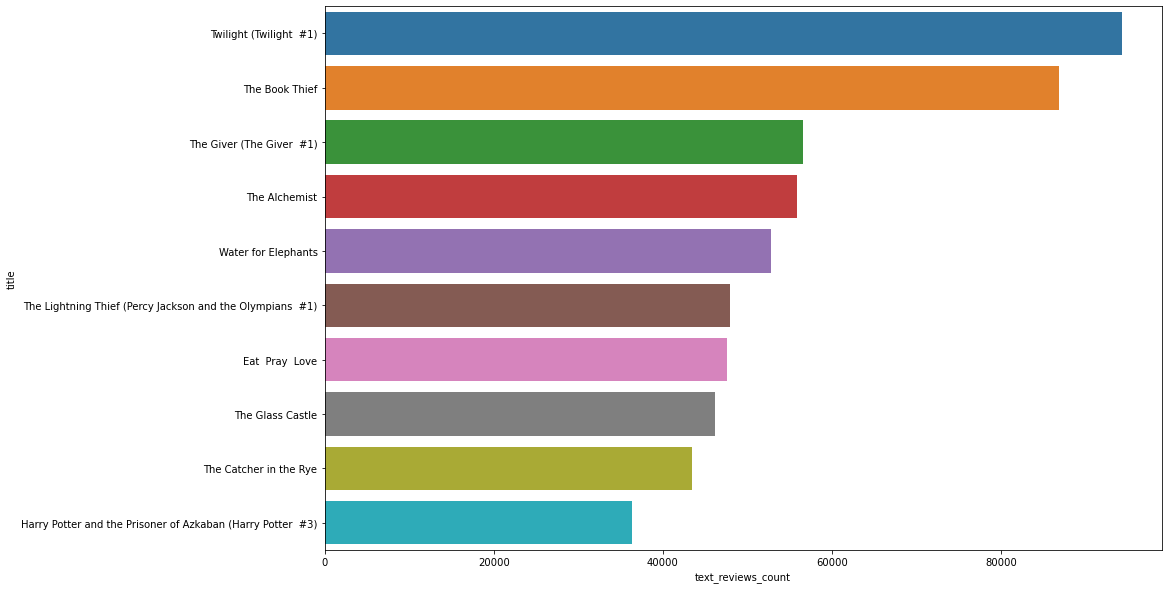

In [139]:
top_text_rated = df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize = (15,10))
sns.barplot(top_text_rated['text_reviews_count'], top_text_rated.index)

The top 10 books with the most number of ratings with text reviews

D:\Anaconda\envs\grproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='title', ylabel='authors'>

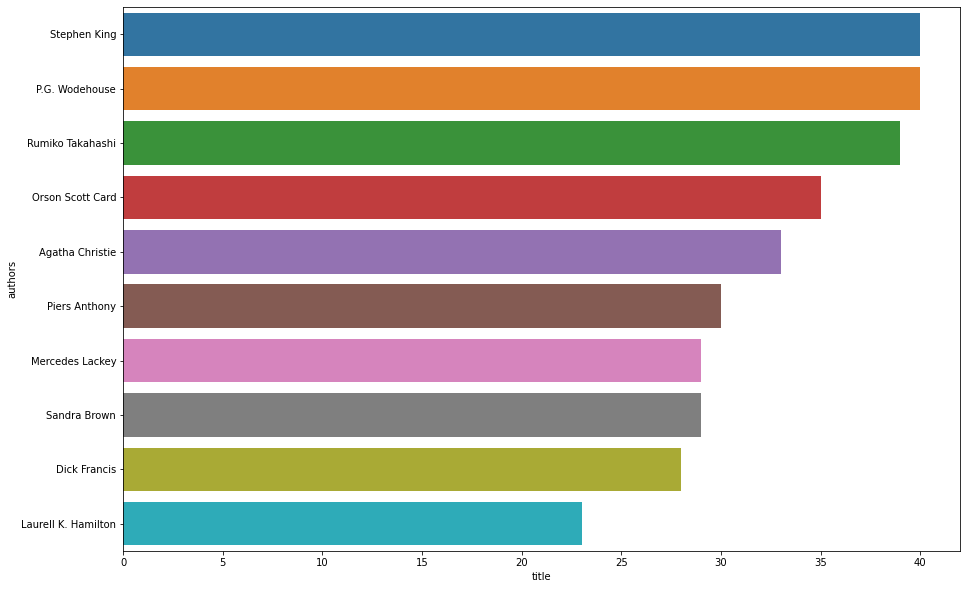

In [140]:
top_author = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize = (15, 10))
sns.barplot(top_author['title'], top_author.index)

Top 10 authors who have published the most books in this dataset.

D:\Anaconda\envs\grproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='title', ylabel='publisher'>

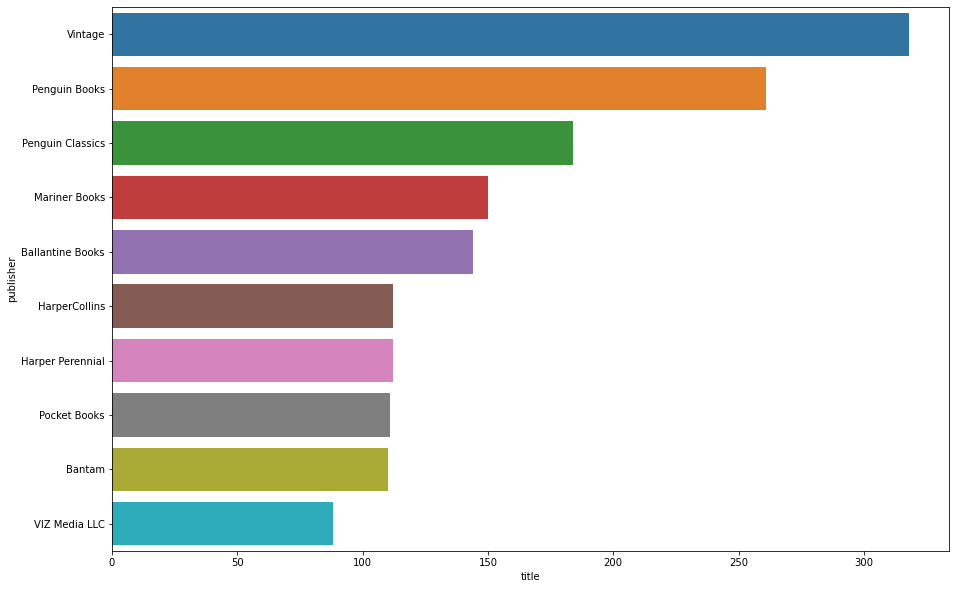

In [141]:
top_publisher = df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('publisher')
plt.figure(figsize = (15, 10))
sns.barplot(top_publisher['title'], top_publisher.index)

Top 10 publisher who have published the most books in this dataset.

<AxesSubplot:xlabel='publication_year', ylabel='text_reviews_count'>

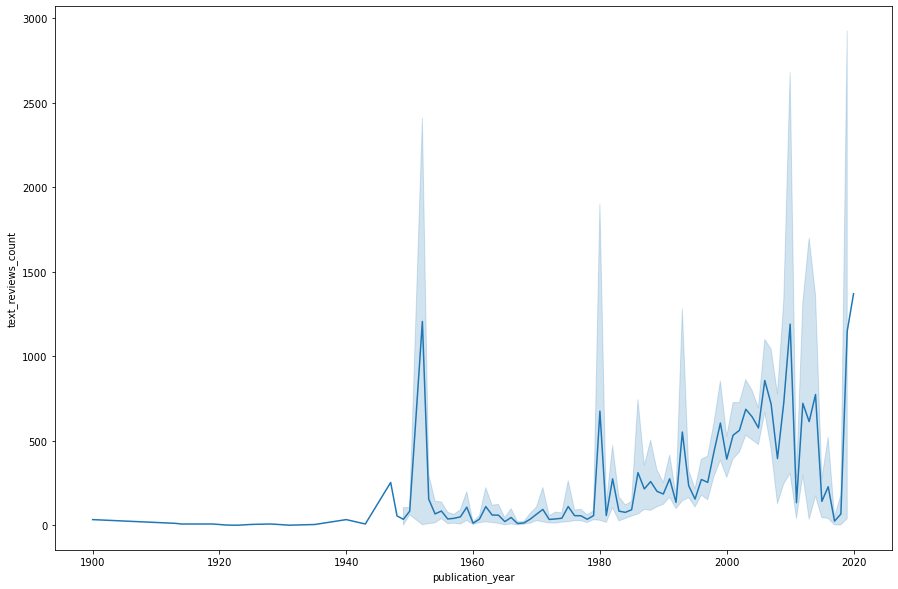

In [142]:
plt.figure(figsize = (15, 10))
sns.lineplot(x="publication_year", y="text_reviews_count", data=df)

<AxesSubplot:xlabel='publication_year', ylabel='ratings_count'>

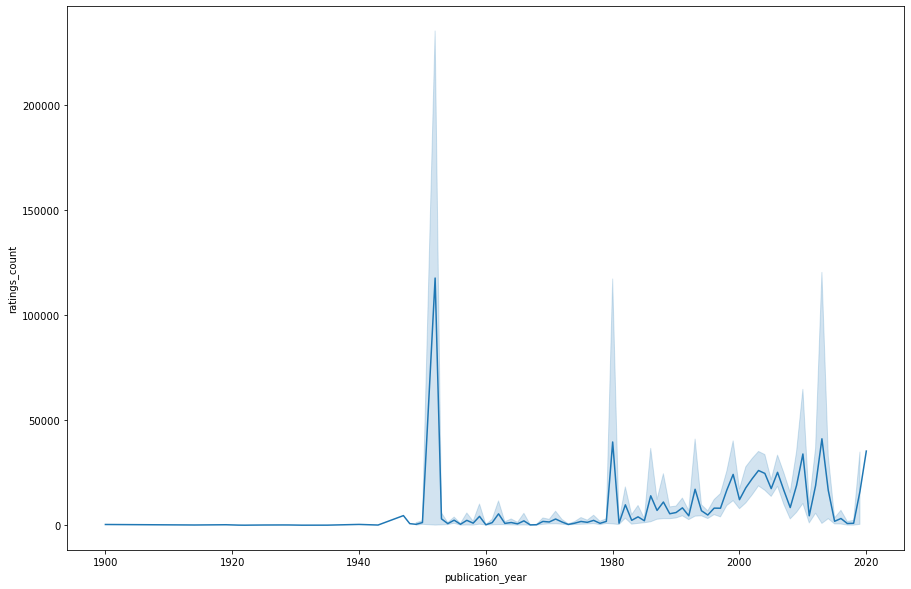

In [33]:
plt.figure(figsize = (15, 10))
sns.lineplot(x="publication_year", y="ratings_count", data=df)

<AxesSubplot:xlabel='publication_year', ylabel='average_rating'>

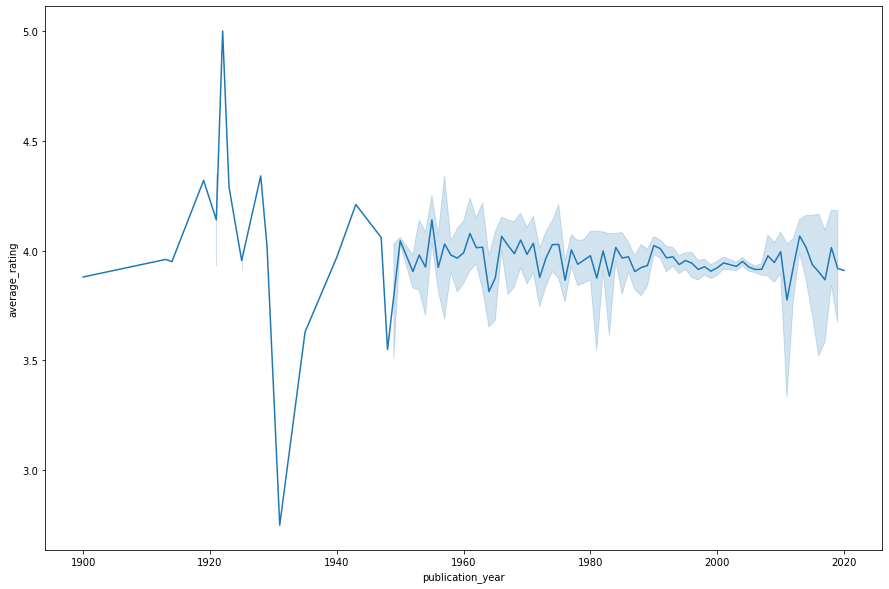

In [34]:
plt.figure(figsize = (15, 10))
sns.lineplot(x="publication_year", y="average_rating", data=df)

As we can see from the graphs above the number of ratings and reviews started to increase from 1980, which may be related to the popularity of the Internet and mobile devices.

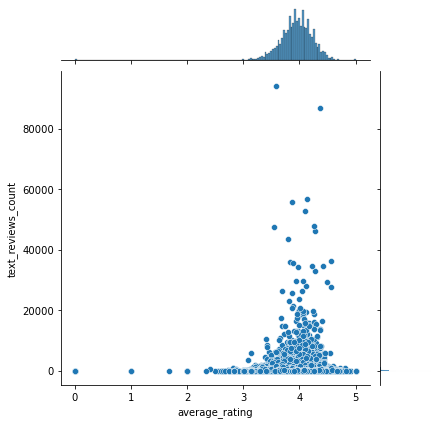

In [35]:
sns.jointplot(data=df, x="average_rating", y="text_reviews_count")

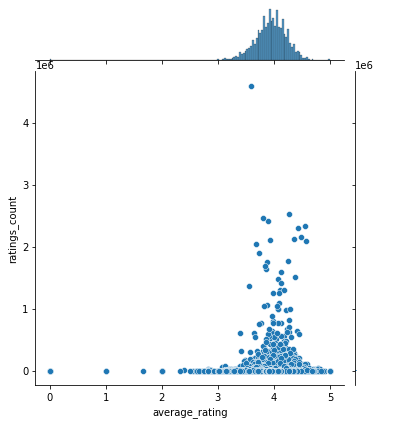

In [36]:
sns.jointplot(data=df, x="average_rating", y="ratings_count")

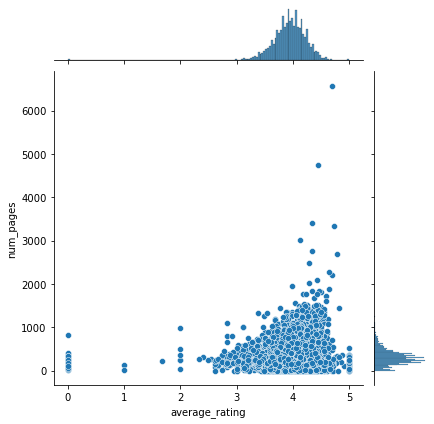

In [37]:
sns.jointplot(data=df, x="average_rating", y="num_pages")

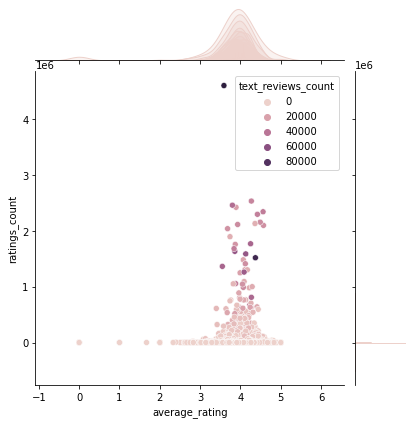

In [38]:
sns.jointplot(data=df, x = 'average_rating', y = 'ratings_count', hue = 'text_reviews_count')

From the above tables I can see that the results shown are positively skewed because of the presence of some outliers.

In [39]:
df.corr()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_year,language_code_num,publisher_num,authors_num
bookID,1.000000,-0.036207,-0.002185,-0.026134,-0.076820,-0.081289,0.027327,0.010615,-0.036583,-0.000822
average_rating,-0.036207,1.000000,-0.001965,0.150477,0.038224,0.033663,-0.031742,0.027692,0.027334,0.021078
isbn13,-0.002185,-0.001965,1.000000,-0.009818,0.005494,0.008152,-0.000349,0.011019,0.013326,-0.027346
num_pages,-0.026134,0.150477,-0.009818,1.000000,0.034337,0.036977,-0.019613,0.011078,0.012229,0.004256
ratings_count,-0.076820,0.038224,0.005494,0.034337,1.000000,0.865977,0.044568,-0.024830,-0.003838,0.001498
text_reviews_count,-0.081289,0.033663,0.008152,0.036977,0.865977,1.000000,0.066914,-0.035176,-0.005852,-0.007090
publication_year,0.027327,-0.031742,-0.000349,-0.019613,0.044568,0.066914,1.000000,0.032794,-0.015249,-0.004307
language_code_num,0.010615,0.027692,0.011019,0.011078,-0.024830,-0.035176,0.032794,1.000000,0.022248,-0.002602
publisher_num,-0.036583,0.027334,0.013326,0.012229,-0.003838,-0.005852,-0.015249,0.022248,1.000000,0.036968
authors_num,-0.000822,0.021078,-0.027346,0.004256,0.001498,-0.007090,-0.004307,-0.002602,0.036968,1.000000


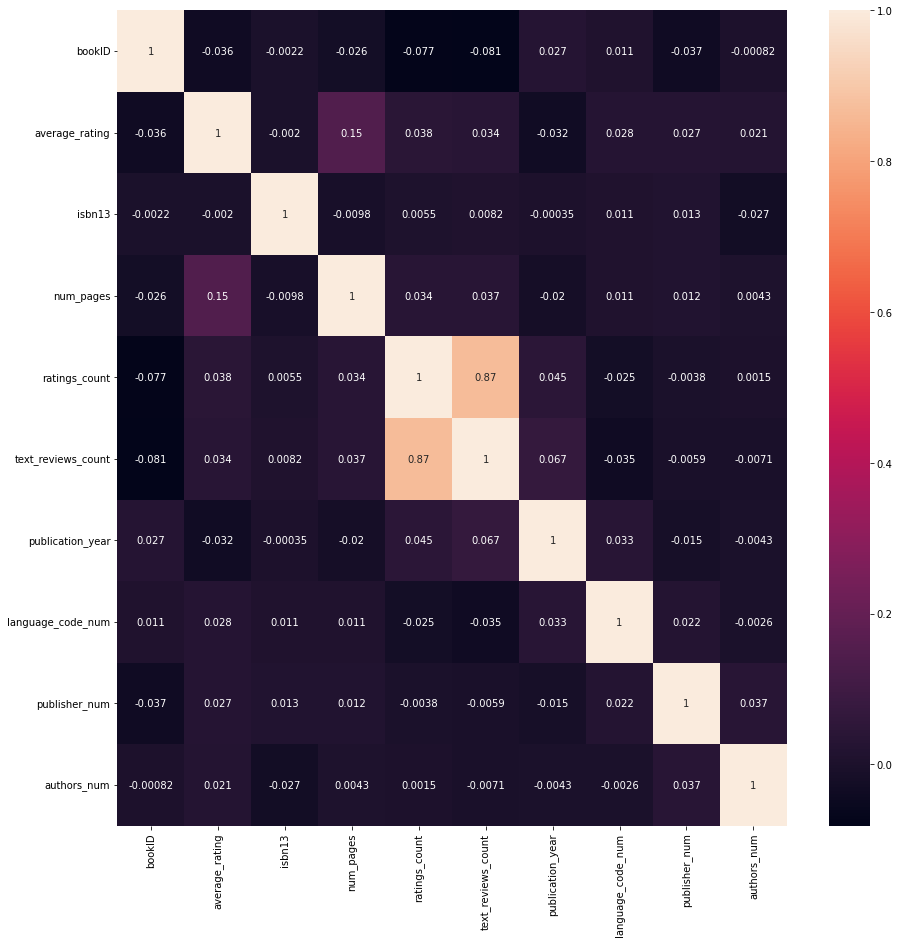

In [45]:
fig, axes = plt.subplots(figsize=(15, 15)) 
sns.heatmap(data=df.corr(), annot=True, ax=axes) 
plt.show()

From the correlation we can see that the relationship between the number of pages, ratings count and text reviews count is more important.

# 4. Modeling and Machine Learning

In [42]:
df_v2 = df.drop(['bookID', 'title', 'authors', 'language_code', 'isbn', 'isbn13', 'publication_date', 'publisher'], axis=1)

Created new dataframe.

In [43]:
df_v2.head()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,language_code_num,publisher_num,authors_num
0,4.57,652,2095690,27591,2006,2.0,1778.0,2626.0
1,4.49,870,2153167,29221,2004,2.0,1778.0,2626.0
2,4.42,352,6333,244,2003,2.0,1773.0,2622.0
3,4.56,435,2339585,36325,2004,2.0,1778.0,2626.0
4,4.78,2690,41428,164,2004,2.0,1773.0,2626.0


In [46]:
df_v2.corr()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,language_code_num,publisher_num,authors_num
average_rating,1.000000,0.150477,0.038224,0.033663,-0.031742,0.027692,0.027334,0.021078
num_pages,0.150477,1.000000,0.034337,0.036977,-0.019613,0.011078,0.012229,0.004256
ratings_count,0.038224,0.034337,1.000000,0.865977,0.044568,-0.024830,-0.003838,0.001498
text_reviews_count,0.033663,0.036977,0.865977,1.000000,0.066914,-0.035176,-0.005852,-0.007090
publication_year,-0.031742,-0.019613,0.044568,0.066914,1.000000,0.032794,-0.015249,-0.004307
language_code_num,0.027692,0.011078,-0.024830,-0.035176,0.032794,1.000000,0.022248,-0.002602
publisher_num,0.027334,0.012229,-0.003838,-0.005852,-0.015249,0.022248,1.000000,0.036968
authors_num,0.021078,0.004256,0.001498,-0.007090,-0.004307,-0.002602,0.036968,1.000000


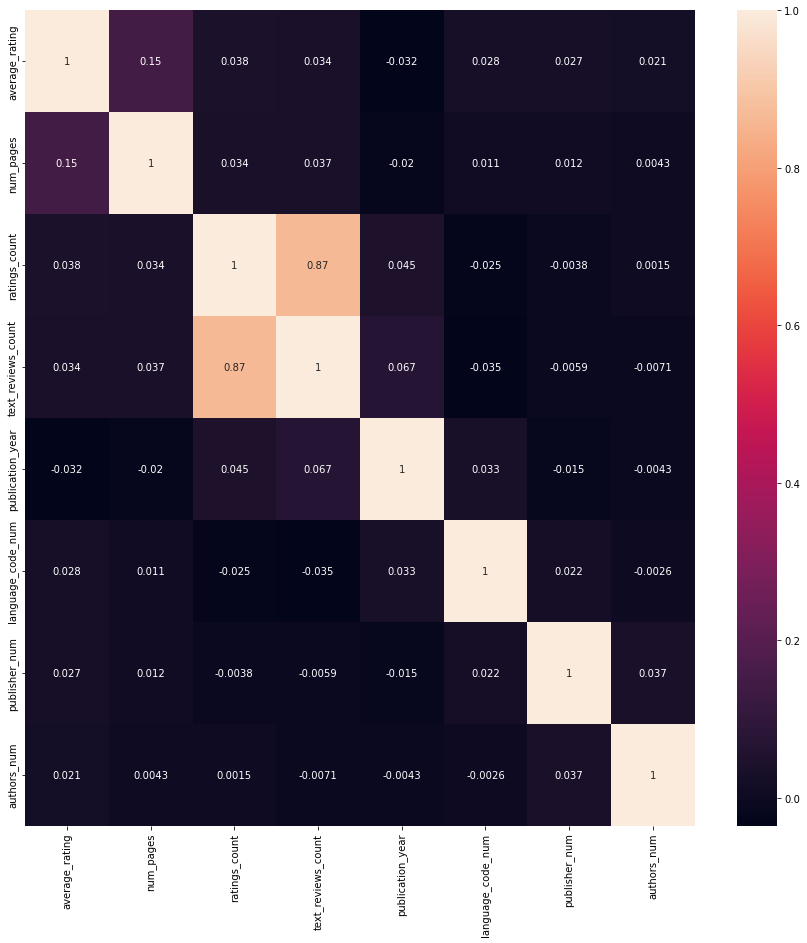

In [47]:
fig, axes = plt.subplots(figsize=(15, 15)) 
sns.heatmap(data=df_v2.corr(), annot=True, ax=axes) 
plt.show()

In [50]:
X = df_v2.drop('average_rating', axis = 1)
y = df_v2['average_rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Split data into test and training set.

# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = regr.predict(X_test)

In [53]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,3.85,3.926649,-0.076649
1,3.97,3.938333,0.031667
2,3.92,3.901160,0.018840
3,0.00,3.921005,-3.921005
4,4.16,4.009991,0.150009
5,3.99,4.024805,-0.034805
6,3.68,3.894163,-0.214163
7,4.01,3.936618,0.073382
8,3.94,3.965134,-0.025134
9,4.17,4.008926,0.161074


In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Model Evaluation with r2 score, mean squared error and mean absolute error metrics

In [56]:
print('r2 score:', r2_score(y_test, y_pred))
print('mean squared error:', mean_squared_error(y_test, y_pred))
print('mean absolute error:', mean_absolute_error(y_test, y_pred))

r2 score: 0.03136449188175949
mean squared error: 0.1222088433826791
mean absolute error: 0.22607441146333618


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

regr_rf = RandomForestRegressor(max_depth=5, random_state=0)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [58]:
y_pred_rf = regr_rf.predict(X_test)

In [59]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred_rf.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,3.85,3.938839,-0.088839
1,3.97,3.907580,0.062420
2,3.92,3.920678,-0.000678
3,0.00,1.828998,-1.828998
4,4.16,3.999464,0.160536
5,3.99,4.077408,-0.087408
6,3.68,3.907580,-0.227580
7,4.01,3.952785,0.057215
8,3.94,3.930546,0.009454
9,4.17,4.045598,0.124402


In [60]:
print('r2 score:', r2_score(y_test, y_pred_rf))
print('mean squared error:', mean_squared_error(y_test, y_pred_rf))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_rf))

r2 score: 0.1329958806592363
mean squared error: 0.10938642011843232
mean absolute error: 0.22405765054293175


# Ridge Regression

In [61]:
from sklearn.linear_model import Ridge

regr_r = Ridge()
regr_r.fit(X_train, y_train)

Ridge()

In [62]:
y_pred_r = regr_r.predict(X_test)

In [63]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred_r.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,3.85,3.926649,-0.076649
1,3.97,3.938333,0.031667
2,3.92,3.901160,0.018840
3,0.00,3.921005,-3.921005
4,4.16,4.009991,0.150009
5,3.99,4.024805,-0.034805
6,3.68,3.894163,-0.214163
7,4.01,3.936618,0.073382
8,3.94,3.965133,-0.025133
9,4.17,4.008926,0.161074


In [64]:
print('r2 score:', r2_score(y_test, y_pred_r))
print('mean squared error:', mean_squared_error(y_test, y_pred_r))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_r))

r2 score: 0.03136446830115336
mean squared error: 0.12220884635774927
mean absolute error: 0.22607441643918214


# Test Linear Regression model with new dataframe

In [66]:
df_v3 = df.drop(['bookID', 'title', 'authors', 'language_code', 'isbn', 'isbn13', 'publication_date', 'publisher', 'publisher_num', 'authors_num'], axis=1)

Created another new dataframe without encoded authors and publishers

In [67]:
df_v3.head()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,language_code_num
0,4.57,652,2095690,27591,2006,2.0
1,4.49,870,2153167,29221,2004,2.0
2,4.42,352,6333,244,2003,2.0
3,4.56,435,2339585,36325,2004,2.0
4,4.78,2690,41428,164,2004,2.0


In [68]:
X = df_v3.drop('average_rating', axis = 1)
y = df_v2['average_rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
regr_v3 = LinearRegression()
regr_v3.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred_l_v3 = regr_v3.predict(X_test)

In [71]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': y_pred_l_v3.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,3.85,3.928396,-0.078396
1,3.97,3.926203,0.043797
2,3.92,3.901610,0.018390
3,0.00,3.925464,-3.925464
4,4.16,3.999270,0.160730
5,3.99,4.026011,-0.036011
6,3.68,3.893678,-0.213678
7,4.01,3.938500,0.071500
8,3.94,3.970056,-0.030056
9,4.17,4.005151,0.164849


In [72]:
print('r2 score:', r2_score(y_test, y_pred_l_v3))
print('mean squared error:', mean_squared_error(y_test, y_pred_l_v3))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_l_v3))

r2 score: 0.02962628111457455
mean squared error: 0.12242814643902242
mean absolute error: 0.22614172829283674
